**Importing necessary libraries**

In [526]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

**Loading the data**

In [527]:
df = pd.read_csv('Dataset/Mall_customers.csv')

In [528]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [529]:
df.shape

(200, 5)

In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [531]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [532]:
df.drop(['CustomerID', 'Gender', 'Age'], axis = 'columns', inplace = True)

In [533]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [534]:
df.skew()

Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

**Outlier Detection**

<Axes: >

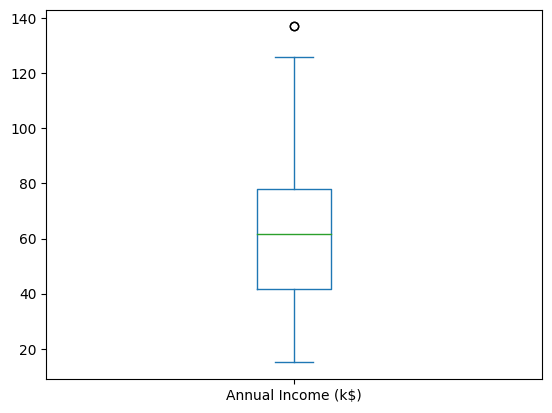

In [535]:
df['Annual Income (k$)'].plot(kind = 'box')

<Axes: >

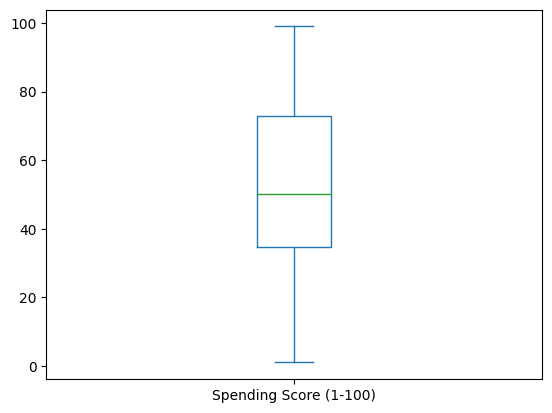

In [536]:
df['Spending Score (1-100)'].plot(kind = 'box')

**Scaling the Columns**

In [537]:
scaler = StandardScaler()

In [538]:
scaled_array = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_array, columns = df.columns)

In [539]:
scaled_df.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


**Elbow Point**

In [540]:
sse = []
k_rng = range(1, 11)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df)
    sse.append(km.inertia_)

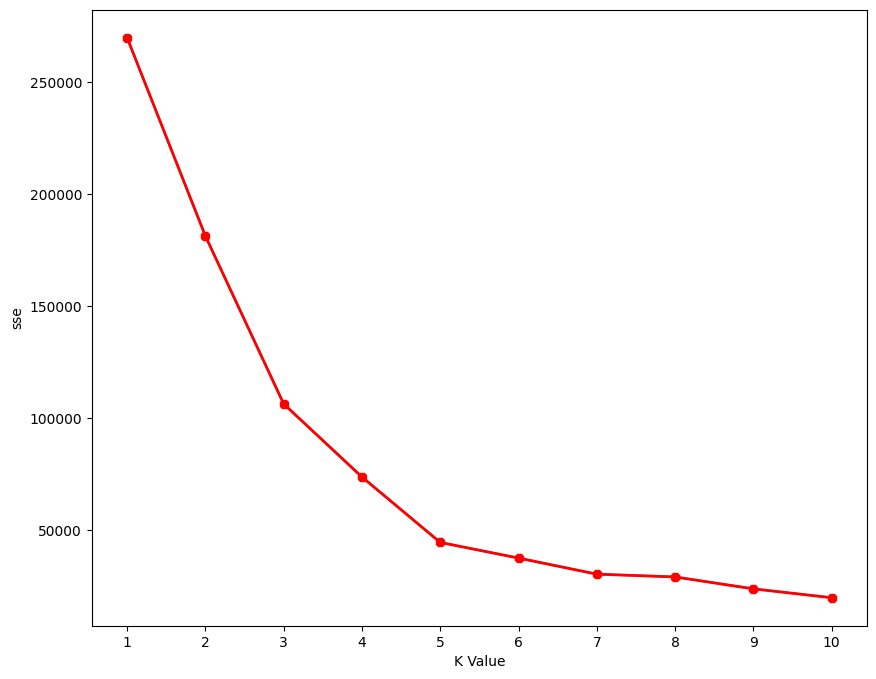

In [542]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 11),sse)
plt.plot(range(1, 11), sse, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("sse")
plt.show()

**Performing K-Means Clustering**

In [543]:
km =KMeans(n_clusters = 5, init = 'k-means++')
y = km.fit_predict(scaled_df)

In [544]:
scaled_df["label"] = y

In [545]:
scaled_df.head()

,Annual Income (k$),Spending Score (1-100),label
0,-1.738999,-0.434801,2
1,-1.738999,1.195704,1
2,-1.700830,-1.715913,2
3,-1.700830,1.040418,1
4,-1.662660,-0.395980,2


**Visualization Of Clusters**

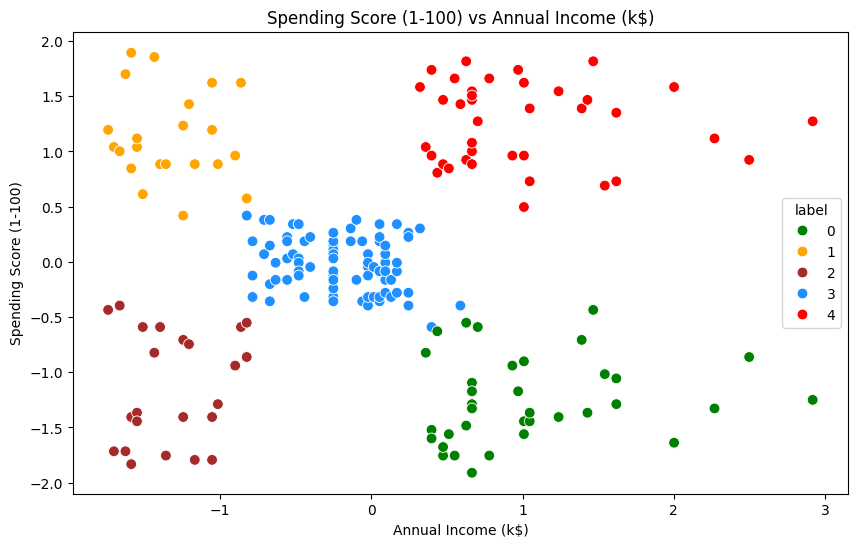

In [546]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = "label", palette = ['green', 'orange', 'brown', 'dodgerblue', 'red'], legend = 'full', data = scaled_df, s = 60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()